# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task_starter import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

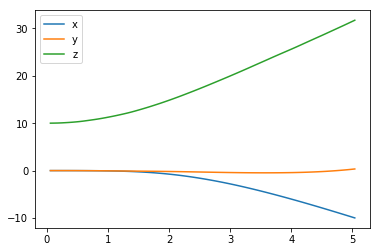

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

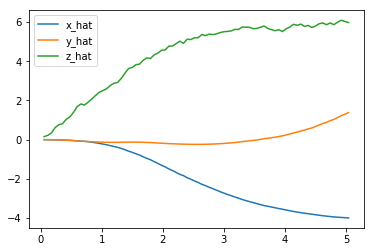

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

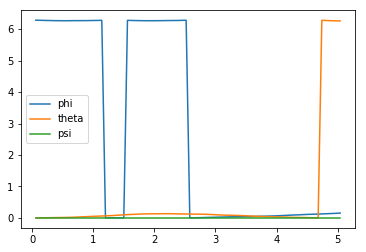

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

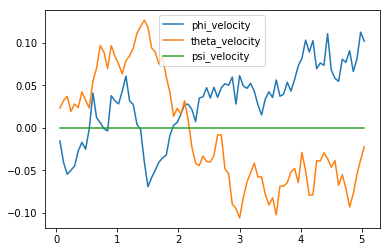

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

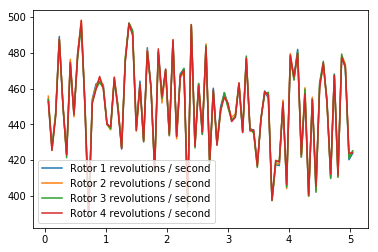

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -9.98301434   0.34110778  31.71450258   0.1536999    6.26132971   0.        ]
[-3.99188543  1.38138508  5.97907798]
[ 0.10180344 -0.0222924   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task_starter import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.828 (best =   0.624), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
from agents.agent import DDPG
from task import Task

# Set initial conditions
runtime = 5.                                     # Time limit of the episode
init_pose = np.array([0., 0., 1., 0., 0., 0.])   # Initial pose (Assume launch pad)
init_velocities = np.array([0., 0., 0.])         # Initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # Initial angle velocities
target_pose = np.array([0., 0., 50.])            # Target pose (Take off)
num_episodes = 300

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pose)
agent = DDPG(task)

rewards_list = []
successful_episodes = []
best_total_reward = -np.inf

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # Start a new episode
    total_reward = 0 # Reset total reward for each episode
    while True:
        # Select action for given state following current policy
        action = agent.act(state)
        # Determine next state, reward, and if episode has ended
        next_state, reward, done, reached = task.step(action)
        # Save experience and learn from replay buffer unless agent succeeded on 4 of last 5 episodes
        keep_weights = (len(successful_episodes) > 4 and i_episode - 5 <= successful_episodes[-4])
        agent.step(action, reward, next_state, done, keep_weights)
        # Roll over state
        state = next_state
        # Add to episode reward
        total_reward += reward
        if done:
            # Update best total reward
            if total_reward > best_total_reward:
                best_total_reward = total_reward
            # Update list of episodes where target was reached
            if reached:
                successful_episodes.append(i_episode)
            print("\rEpisode = {:4d}, reward = {:7.3f} (best = {:7.3f}), Successful episodes: {}".format(
                i_episode, total_reward, best_total_reward, successful_episodes), end="")
            rewards_list.append((i_episode, total_reward))
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =  300, reward = 277.653 (best = 288.115), Successful episodes: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 24

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0,0.5,'Total Reward')

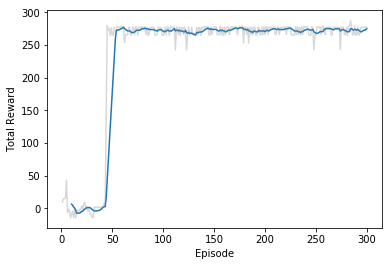

In [11]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

eps, rewards = np.array(rewards_list).T
smoothed_rewards = running_mean(rewards, 10)
plt.plot(eps[-len(smoothed_rewards):], smoothed_rewards)
plt.plot(eps, rewards, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [12]:
# Simulate episode 201
done = False
labels = ['time', 'reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode() # Start a new episode
while True:
    # Select action for given state following current policy
    action = agent.act(state)
    # Determine next state, reward, and if episode has ended
    next_state, reward, done, reached = task.step(action)
    # Roll over state
    state = next_state
    # Add to results dictionary
    result = [task.sim.time] + [reward] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
        results[labels[ii]].append(result[ii])
    if done:
        break

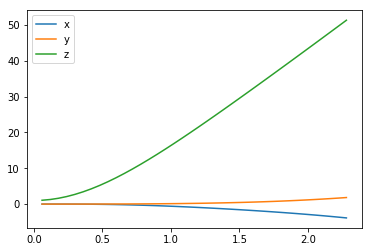

In [13]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

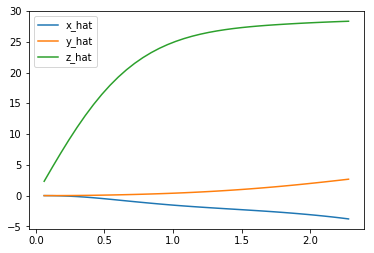

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

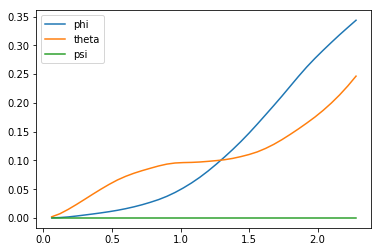

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

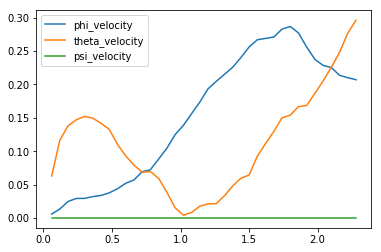

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

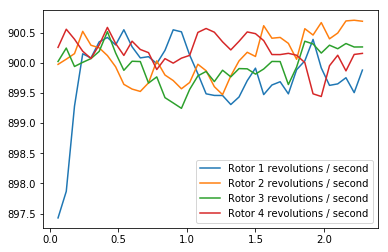

In [17]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task that I specified is a takeoff task. The quadcopter starts from a small launch pad one meter off the ground and has the goal of attaining an altitude of 50 meters.

In designing the reward function, I had a goal of simplicity. The reward function has four basic components.

1. At every timestep, there is a reward for altitude that increases exponentially as the agent approaches the target. This is calculated using the formula:

\begin{equation*}
(1 + \frac{current_z - init_z}{goal_z - init_z})^2
\end{equation*}

2. At every timestep, there is a penalty of -1 for a decrease in altitude. I set this to be constant so that a slight drop would be penalized just as heavily as a large drop in order to teach the agent to always increase altitude. Since the agent is rewarded as long as its altitude is above zero, this penalty also prevents the agent from reward hacking by flying up during the first half of an episode only to collect rewards while falling to earth during the second half of the episode.

3. If an episode ends without reaching the goal, the agent receives a penalty that decreases as they approach the goal. This is calculated using the formula:

\begin{equation*}
-5 \times (1 - \frac{current_z - init_z}{goal_z - init_z})
\end{equation*}

4. If an episode ends by reaching the goal, the agent receives a fixed bonus of 5 plus two additional flexible bonuses. The first flexible bonus is equal to the amount by which final altitude exceeded the target. The second is equal to double the amount of spare time remaining in the episode, to incentivize completing faster.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: My agent uses the Deep Deterministic Policy Gradients (DDPG) learning algorithm.

At each time step, the agent chooses an action based on a deterministic policy calculated by an actor model. The actor model generates this policy by using a neural network to learn a mapping from states to actions. The network has an input layer with 18 nodes. Although the state vector for a single time step only has six elements (x, y, z, phi, theta, psi; i.e. position and angle relative to each of the three axes), the input size for the neural network is 18 because the algorithm repeats each chosen action three times. The use of action repeats reduces the number of computations required and smooths the action policy. The input layer connects to three fully-connected hidden layers with 32, 64, and 32 nodes, respectively, and relu activation functions. The final fully-connected layer has four nodes and determines the speed for each rotor by scaling the output of a sigmoid activation function. The actor model uses a learning rate, alpha, of 0.001.

To allow for exploration, an exploration policy is created by adding noise generated from a Ornstein-Uhlenbeck (OU) process to the deterministic policy chosen by the actor model. The OU process generates samples from a normal distribution that are temporally correlated, which is advantageous when exploring physical environments that have momentum. In setting the hyperparameters for the OU process (theta, sigma, and mu), I chose the values used in the original DDPG paper (0.15, 0.2, and 0). 

After taking the action chosen by the exploration policy, the agents saves information about the experience returned from the environment (including the next state, the reward, and whether the episode has terminated) in a replay buffer. Once enough experiences has been saved in the replay buffer, the agent learns by sampling a batch of 64 experiences from the replay buffer. The use of the replay buffer allows the agent to learn from a set of uncorrelated transitions.

During the learning process, the agent generates predicted next-state actions from a target actor network. These pairs of next states and actions are then fed into a target critic model which uses a neural network to map them to predicted Q-values. Since the critic model takes as its input state-action pairs, it has two input layers. The first has one node for each element in the state vector (18) and the second has one node for each element in the action vector (4). Each of these input layers connects to a fully-connected hidden layer with 32 nodes and then another fully-connected hidden layer with 64 nodes. All hidden layers have relu activation functions. Next, these different sub-networks are merged and connected to an output layer with a single node that calculates the Q-value for a given state-action pair. Finally, the policy gradient, that is, the derivative of the Q-value with respect to the actions is computed. The critic model uses a learning rate, alpha, of 0.001.

The output of the target critic network—predicted Q-values for the next states that would be reached by following the target policy—are then used to compute Q targets for current states, with a discount rate, gamma, equal to 0.99. Next, the Q targets are current state-action pairs are used to train the local critic network. Action gradients calculated by the local critic network are in turn used to train the local actor network.

Finally, the target networks are updated using a "soft-update" that prevents drastic changes in the network weights. During the soft-update the target network weights are recalculated as an weighted average of the current target weights and the local weights. The parameter tau, which I set to 0.01, means that only 1% weight is given to the local weights during this update.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: On this iteration, the agent learned relatively easily, discovering an optimal strategy after less than 50 episodes. Rather than being gradual, the learning curve indicates an "aha moment," which occured during the first episode where exploration caused the agent to reach the target. Since I specified that the agent should keep the same weights if it had been successful on four of the last five episodes, it stopped learning at episode 50 and was successful on every subsequent episode.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of the project was correctly specifying the reward function. One of the most helpful pieces of advice I read was to start with a very simple task, such as setting initial position to [0, 0, 10] and the target position to [0, 0, 11]. Eventually I discovered a workflow where I would tweak the reward function, test it for 100-200 episodes, and review the best result to see what the agent had learned.

By reviewing the best result, I was able to see when the agent had discovered reward hacking strategies. For instance, I hadn't anticipated that rewarding the agent for any positive altitude would mean that the agent could maximize rewards by flying up during the first half of the episode and then slowly floating down without ever reaching the target. This realization led me to tweak the reward function to add penalties for negative z-velocity.

I also found it interesting that even though the reward function did not try to incentivize sub-goals, such as minimizing yaw, pitch, and roll, the agent nonetheless learned to fly in a fairly stable manner. There was no roll and only a tiny amount of yaw and pitch. The policy that the agent learned seems to have been to apply a near constant level of revolutions per second (~900) on all four rotors.

To further improve this project, I would have liked to continue to adjust the reward function so that the agent could learn to reliably reach an altitude of 100 meters. Additionally, while I was agnostic to whether the quadcopter yawed or pitched for this task, I would be interested to see if I could incentivize even more stable flight. However, since training on my local CPU and iteratively adjusting the reward function was a slow proces, I decided I was satisfied with reaching a height of 50.